In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.gridspec as gridspec
from tslearn.metrics import dtw_path

In [2]:
# 距離計算
def dist(a, b):
    return ((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2) ** 0.5

# 最小値を求める
def get_min(m0, m1, m2, i, j):
    if m0 < m1:
        if m0 < m2:
            return i - 1, j, m0
        else:
            return i - 1, j - 1, m2
    else:
        if m1 < m2:
            return i, j - 1, m1
        else:
            return i - 1, j - 1, m2

In [3]:
# DTW距離を求める関数
def dtw(x, y):
    # xのデータ数，yのデータ数をそれぞれTx,Tyに代入
    Tx = len(x)
    Ty = len(y)
    
    # C:各マスの累積コスト，　B：最小コストの行/列番号
    C = np.zeros((Tx, Ty))
    B = np.zeros((Tx, Ty, 2), int)
    
    # 一番初めのマスのコストを，xとyのそれぞれ一番初めの値にする
    C[0, 0] = dist(x[0], y[0])
    
    # 動的計画法を用いる
    # 左下のマスからスタートし，各マスに到達するため最小の累積コストを1マスずつ求める
    
    # 境界条件：両端が左下と右上にあること
    # 単調性：左下から始まり，右，上，右上のいずれかにしか進まないこと
    # 連続性：繋がっていること
    
    # 一番下の行は，真っ直ぐ右にコストが累積される
    for i in range(Tx):
        C[i, 0] = C[i - 1, 0] + dist(x[i], y[0])
        B[i, 0] = [i - 1, 0]
        
    # 同様に一番左の列は，真っ直ぐ上にコストが累積される
    for j in range(1, Ty):
        C[0, j] = C[0, j - 1] + dist(x[0], y[j])
        B[0, j] = [0, j - 1]
        
    # その他のマスの累積コストを求める
    for i in range(1, Tx):
        for j in range(1, Ty):
            pi, pj, m = get_min(C[i - 1, j],
                                C[i, j - 1],
                                C[i - 1, j - 1],
                                i, j)
            # get_minで返ってきた最小コストを累積コストに足す
            C[i, j] = dist(x[i], y[j]) + m
            # get_minで返ってきた最小コストの行/列番号を保持
            B[i, j] = [pi, pj]
    # 最終的な右上（最終の到達点）のコスト
    cost = C[-1, -1]
    
    path = [[Tx - 1, Ty - 1]]
    
    # 逆順にたどることでパスを求める
    i = Tx - 1
    j = Ty - 1
    
    while((B[i, j][0] != 0) or (B[i, j][1] != 0)):
        path.append(B[i, j])
        i, j = B[i, j].astype(int)
    path.append([0, 0])
    return np.array(path), cost

In [23]:
# データの準備
data = pd.read_csv("/Users/yuki-f/scratchsearch/splitted/11242.csv", encoding="shift-jis", usecols=['x','y']).values
inputData = pd.read_csv("/Users/yuki-f/scratchsearch/splitted/12404.csv", encoding="shift-jis", usecols=['x','y']).values

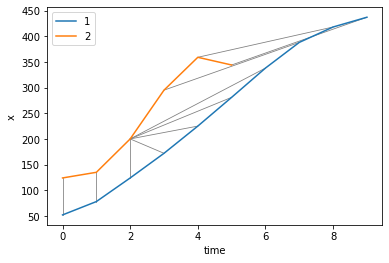

In [24]:
# x座標の変化
pathes = []
path, cost = dtw(data, inputData)
fig = plt.figure()
for line in path:
    plt.plot(line, [data[line[0]][0], inputData[line[1]][0]], linewidth=0.8, c="gray")
plt.plot(data[:,0],label="1")
plt.plot(inputData[:,0],label="2")
plt.xlabel("time")
plt.ylabel("x")
plt.legend()
plt.show()
fig.savefig("./1-2-x.png")
pathes.append(path)

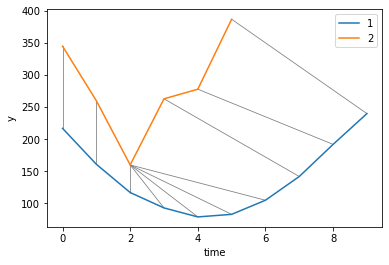

In [25]:
# y座標の変化
pathes = []
path, cost = dtw(data, inputData)
fig = plt.figure()
for line in path:
    plt.plot(line, [data[line[0]][1], inputData[line[1]][1]], linewidth=0.8, c="gray")
plt.plot(data[:,1],label="1")
plt.plot(inputData[:,1],label="2")
plt.xlabel("time")
plt.ylabel("y")
plt.legend()
plt.show()
fig.savefig("./1-2-y.png")
pathes.append(path)

In [29]:
# データの準備
data = pd.read_csv("/Users/yuki-f/scratchsearch/splitted/6304.csv", encoding="shift-jis", usecols=['x','y']).values
inputData = pd.read_csv("/Users/yuki-f/scratchsearch/splitted/8296.csv", encoding="shift-jis", usecols=['x','y']).values

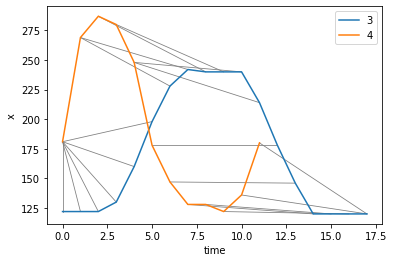

In [30]:
# x座標の変化
pathes = []
path, cost = dtw(data, inputData)
fig = plt.figure()
for line in path:
    plt.plot(line, [data[line[0]][0], inputData[line[1]][0]], linewidth=0.8, c="gray")
plt.plot(data[:,0],label="3")
plt.plot(inputData[:,0],label="4")
plt.xlabel("time")
plt.ylabel("x")
plt.legend()
plt.show()
fig.savefig("./3-4-x.png")
pathes.append(path)

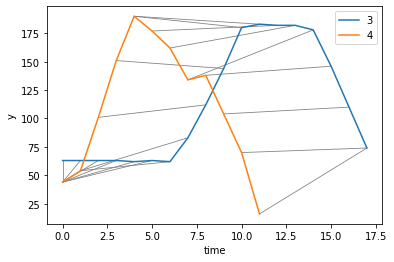

In [31]:
# y座標の変化
pathes = []
path, cost = dtw(data, inputData)
fig = plt.figure()
for line in path:
    plt.plot(line, [data[line[0]][1], inputData[line[1]][1]], linewidth=0.8, c="gray")
plt.plot(data[:,1],label="3")
plt.plot(inputData[:,1],label="4")
plt.xlabel("time")
plt.ylabel("y")
plt.legend()
plt.show()
fig.savefig("./3-4-y.png")
pathes.append(path)